# Aprendizaje Automatico
## Actividad 1
## Ivan J. Zepeda Gonzalez



El proceso empleado sera: 

    generar el dataframe    
    formatearlo y nombrar columnas
    gestionar los valores  missing/"?"
    generar un set de entrenamiento y prueba
    correr el naive bayes en gaussian, multinomial y burnolli?
    mostrar las metricas
    generar una curva ROC
    

In [616]:
import csv
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import preprocessing
from sklearn.impute import MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [617]:
#new_doc = open("house-votes-84.data").read()
#print(new_doc)


In [618]:
columns= ['Class Name','Handicap child','Water project','Adoption','Physician fee','El Salvador','Religious group',
         'Anti satellite','Aid to Nicaragua','MX misile','Immigration','Synfuels','Education spending','Superfunds',
         'Crime','Exports','Export admin to South Africa']

df=pd.read_csv("house-votes-84.data")#, names=columns
df.columns=columns
df.columns = [c.replace(' ', '_') for c in df.columns]

df.head()



,Class_Name,Handicap_child,Water_project,Adoption,Physician_fee,El_Salvador,Religious_group,Anti_satellite,Aid_to_Nicaragua,MX_misile,Immigration,Synfuels,Education_spending,Superfunds,Crime,Exports,Export_admin_to_South_Africa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


 Este paso permite tratar adecuadamente [ o el inicio para] los missing values,
y que el "?" no se considere como un valor.

 Se puede obserar esto en el valor unique en describe(), 
se reduce a solo 2 opciones.
Decidi hacer la sustitucion de forma manual

\* Hay una anotacion mas abajo, en la variable **'dummies'**

In [619]:
dummies=pd.get_dummies(df.Class_Name)
dummies.head(3)
#Podria sustituir estos valores dentro del dataframe para tener binarios en lugar de un valor string de classname.
#aunque como class_name es el target, no se si convenga hacer eso:
#Manenterlo en variables binarias, o variable numerica?

,democrat,republican
0,0,1
1,1,0
2,1,0


In [620]:
df.replace({"?":np.NaN}, inplace=True)
df.replace({"y":1}, inplace=True)
df.replace({"n":0}, inplace=True)
df.replace({"democrat":0},inplace=True) #
df.replace({"republican":1},inplace=True) #
df.head()

,Class_Name,Handicap_child,Water_project,Adoption,Physician_fee,El_Salvador,Religious_group,Anti_satellite,Aid_to_Nicaragua,MX_misile,Immigration,Synfuels,Education_spending,Superfunds,Crime,Exports,Export_admin_to_South_Africa
0,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
1,0,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
4,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [621]:
#Se puede hacer un mapa de los indices que son faltantes [missing], con true cuando son faltantes, y flase, cuandocontienen valor.
# para tratar esta informacion, se ha transformado el "?" en un NaN
indicator = MissingIndicator(missing_values=np.NaN)
indicator = indicator.fit_transform(df)
indicator = pd.DataFrame(indicator)
#print(indicator)

In [622]:
df.describe()

,Class_Name,Handicap_child,Water_project,Adoption,Physician_fee,El_Salvador,Religious_group,Anti_satellite,Aid_to_Nicaragua,MX_misile,Immigration,Synfuels,Education_spending,Superfunds,Crime,Exports,Export_admin_to_South_Africa
count,434.000000,422.000000,386.000000,423.000000,423.000000,419.000000,423.000000,420.000000,419.000000,412.000000,427.000000,414.000000,403.000000,409.000000,417.000000,406.000000,330.000000
mean,0.384793,0.443128,0.502591,0.598109,0.416076,0.503580,0.640662,0.569048,0.577566,0.502427,0.503513,0.362319,0.421836,0.508557,0.592326,0.428571,0.812121
std,0.487108,0.497345,0.500642,0.490861,0.493490,0.500585,0.480375,0.495800,0.494537,0.500602,0.500574,0.481252,0.494466,0.500539,0.491992,0.495482,0.391209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Se empieza a dar formato y asignar variables para el entrenamiento

In [656]:
target = df.Class_Name
inputs=df #.drop("Class_Name",axis='columns')# <- se usa para remover columnas que no sean tan 'dependientes' en el analisis y liberar procesamiento.

In [692]:
#Verificar que los valores sean numericos. 
#Regresa las columnas con estos resultados, incluye los NaN
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

In [658]:
#Un 'approach' es hacer un mean para llenar el valor NaN
#inputs.Columna = inputs.Columna.fillna(inputs.Columna.mean())
inputs.Handicap_child = inputs.Handicap_child.fillna(inputs.Handicap_child.mean())
inputs.Water_project = inputs.Water_project.fillna(inputs.Water_project.mean())
inputs.Adoption = inputs.Adoption.fillna(inputs.Adoption.mean())
inputs.Physician_fee = inputs.Physician_fee.fillna(inputs.Physician_fee.mean())
inputs.El_Salvador = inputs.El_Salvador.fillna(inputs.El_Salvador.mean())
inputs.Religious_group = inputs.Religious_group.fillna(inputs.Religious_group.mean())
inputs.Anti_satellite = inputs.Anti_satellite.fillna(inputs.Anti_satellite.mean())
inputs.Aid_to_Nicaragua = inputs.Aid_to_Nicaragua.fillna(inputs.Aid_to_Nicaragua.mean())
inputs.MX_misile = inputs.MX_misile.fillna(inputs.MX_misile.mean())
inputs.Immigration = inputs.Immigration.fillna(inputs.Immigration.mean())
inputs.Synfuels = inputs.Synfuels.fillna(inputs.Synfuels.mean())
inputs.Education_spending = inputs.Education_spending.fillna(inputs.Education_spending.mean())
inputs.Superfunds = inputs.Superfunds.fillna(inputs.Superfunds.mean())
inputs.Crime = inputs.Crime.fillna(inputs.Crime.mean())
inputs.Exports = inputs.Exports.fillna(inputs.Exports.mean())
inputs.Export_admin_to_South_Africa = inputs.Export_admin_to_South_Africa.fillna(inputs.Export_admin_to_South_Africa.mean())
#podria hacer un 'floor' para hacerlo 0 o 1. No se si esto influye al hacer un entrenamiento
inputs.head()

,Class_Name,Handicap_child,Water_project,Adoption,Physician_fee,El_Salvador,Religious_group,Anti_satellite,Aid_to_Nicaragua,MX_misile,Immigration,Synfuels,Education_spending,Superfunds,Crime,Exports,Export_admin_to_South_Africa
0,1,0.000000,1.0,0.0,1.000000,1.00000,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,1.0,0.0,0.812121
1,0,0.443128,1.0,1.0,0.416076,1.00000,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0,1.0,0.0,0.000000
2,0,0.000000,1.0,1.0,0.000000,0.50358,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,1.000000
3,0,1.000000,1.0,1.0,0.000000,1.00000,1.0,0.0,0.0,0.0,0.0,1.0,0.421836,1.0,1.0,1.0,1.000000
4,0,0.000000,1.0,1.0,0.000000,1.00000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,1.000000


### Se generan los conjuntos y sets de entrenamiento y prueba. 
Estos se usan para modelar NB Gausiano, Bernoulli, y Multinomial.
Tambien se muestra el score de cada uno

In [659]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)  #dividing the train set into 20 80 ratio, is the size of 0.2


In [660]:
print(len(X_train))
print(len(X_test))
print(len(inputs))

347
87
434


In [661]:
GaussianModel=GaussianNB()
GaussianModel.fit(X_train,y_train)
GaussianModel.score(X_test,y_test)#Return the mean accuracy on the given test data and labels.

1.0

In [662]:
X_test[:10]

,Class_Name,Handicap_child,Water_project,Adoption,Physician_fee,El_Salvador,Religious_group,Anti_satellite,Aid_to_Nicaragua,MX_misile,Immigration,Synfuels,Education_spending,Superfunds,Crime,Exports,Export_admin_to_South_Africa
154,1,1.0,1.000000,0.0,1.0,1.0,1.0,0.0,0.577566,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000000
31,0,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.000000
386,0,1.0,1.000000,1.0,0.0,1.0,1.0,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.812121
229,1,0.0,1.000000,0.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000
249,1,0.0,1.000000,0.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000
406,0,0.0,0.000000,0.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000000
196,1,0.0,0.502591,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.000000
302,1,0.0,0.000000,0.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000
390,0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000
200,0,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000


In [663]:
BernoulliModel=BernoulliNB()
BernoulliModel.fit(X_train,y_train)
BernoulliModel.score(X_test,y_test)

0.9310344827586207

In [664]:
X_test[:10]

,Class_Name,Handicap_child,Water_project,Adoption,Physician_fee,El_Salvador,Religious_group,Anti_satellite,Aid_to_Nicaragua,MX_misile,Immigration,Synfuels,Education_spending,Superfunds,Crime,Exports,Export_admin_to_South_Africa
154,1,1.0,1.000000,0.0,1.0,1.0,1.0,0.0,0.577566,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000000
31,0,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.000000
386,0,1.0,1.000000,1.0,0.0,1.0,1.0,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.812121
229,1,0.0,1.000000,0.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000
249,1,0.0,1.000000,0.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000
406,0,0.0,0.000000,0.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000000
196,1,0.0,0.502591,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.000000
302,1,0.0,0.000000,0.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000
390,0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000
200,0,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000


In [665]:
MultinomialModel=MultinomialNB()
MultinomialModel.fit(X_train,y_train)
MultinomialModel.score(X_test,y_test)

0.896551724137931

### Se comparan las predicciones con los modelos entrenados

In [694]:
gnb_y_pred=GaussianModel.predict(X_test)
print(GaussianModel.predict(X_test[:10]))
GNB_proba=GaussianModel.predict_proba(X_test)
gnb_score=accuracy_score(y_test,gnb_y_pred)
print("score: "+str(gnb_score))
#print(X_test[:10].Class_Name)


[1 0 0 1 1 0 1 1 0 0]
score:1.0


In [696]:
bnb_y_pred=BernoulliModel.predict(X_test)
print(BernoulliModel.predict(X_test[:10]))
#print(BernoulliModel.predict_proba(X_test[:10]))
BNB_proba=BernoulliModel.predict_proba(X_test)
bnb_score=accuracy_score(y_test,bnb_y_pred)
print("score: "+str(bnb_score))

[1 0 0 1 1 1 1 1 0 0]
score: 0.9310344827586207


In [695]:
mnb_y_pred=MultinomialModel.predict(X_test)#[:10]
print(MultinomialModel.predict(X_test[:10]))
MNB_proba=MultinomialModel.predict_proba(X_test)#[:,1]
mnb_score=accuracy_score(y_test,mnb_y_pred)
print("score: "+str(mnb_score))

[1 0 0 1 1 1 1 1 0 0]
score: 0.896551724137931



Diferencia de los Algoritmos de Naive Bayes:

* **Bernoulli**: Asume que todos los atributos son binarios, y solo toman 2 valores, 0 y 1.
* **Multinomial**: Se usa para datos discretos.
* **Gaussian**: Se usa donde todos los atributos son continuos, y pueden variar en tener diferentes valores. No se representa los atributos en terminos de aparicion.

# Calcular las Metricas
### Matriz de confusion

In [673]:
ConfussionMatrix_Multinomial = confusion_matrix(y_test, mnb_y_pred)
print(ConfussionMatrix_Multinomial)
TP_MNB =ConfussionMatrix_Multinomial[0][0] #True Positives (multinomial)
TN_MNB =ConfussionMatrix_Multinomial[1][1] #True Negatives ( multinomial)
FP_MNB =ConfussionMatrix_Multinomial [0][1]#False Positives (multinomial)
FN_MNB =ConfussionMatrix_Multinomial [1][0] #False Negatives (multinomial)


[[51  9]
 [ 0 27]]


In [698]:
ConfussionMatrix_Bernoulli = confusion_matrix(y_test, bnb_y_pred)
print(ConfussionMatrix_Bernoulli)
TP_BNB = ConfussionMatrix_Bernoulli[0][0]#True Positives (Bernoulli)
TN_BNB = ConfussionMatrix_Bernoulli[1][1]#True Negatives (Bernoulli )
FP_BNB = ConfussionMatrix_Bernoulli[0][1]#False Positives (Bernoulli)
FN_BNB = ConfussionMatrix_Bernoulli[1][0]#False Negatives (Bernoulli)


[[54  6]
 [ 0 27]]


In [700]:
ConfussionMatrix_Gaussian = confusion_matrix(y_test, gnb_y_pred)
print(ConfussionMatrix_Gaussian)
TP_GNB = ConfussionMatrix_Gaussian[0][0]#True Positives (Gaussian)
TN_GNB = ConfussionMatrix_Gaussian[1][1]#True Negatives (Gaussian )
FP_GNB = ConfussionMatrix_Gaussian[0][1]#False Positives (Gaussian)
FN_GNB = ConfussionMatrix_Gaussian[1][0]#False Negatives (Gaussian)


[[60  0]
 [ 0 27]]


Se puede observar que para Gaussian no hay falsos positivos ni falso negativo, y se mantiene en un margen de 0.
Le sigue el Bernoulli y despues Multinomial.

### Accuracy / Error Rate

In [701]:

def accuracy(TP,TN,FP,FN):
    return  (TP + TN) / (TP + TN + FP + FN)

def error_rate(TP,TN,FP,FN):
    #1-accuracy
    return (FP+FN)/(TP+TN+FP+FN)
print("Accuracy")
print("Gaussian:    "+ str(accuracy(TP_GNB,TN_GNB,FP_GNB,FN_GNB)))
print("Bernoulli:   "+ str(accuracy(TP_BNB,TN_BNB,FP_BNB,FN_BNB)))
print("Multinomial: "+ str(accuracy(TP_MNB,TN_MNB,FP_MNB,FN_MNB)))
print("\nError Rate")
print("Gaussian:    "+ str(error_rate(TP_GNB,TN_GNB,FP_GNB,FN_GNB)))
print("Bernoulli:   "+ str(error_rate(TP_BNB,TN_BNB,FP_BNB,FN_BNB)))
print("Multinomial: "+ str(error_rate(TP_MNB,TN_MNB,FP_MNB,FN_MNB)))


Accuracy
Gaussian:    1.0
Bernoulli:   0.9310344827586207
Multinomial: 0.896551724137931

Error Rate
Gaussian:    0.0
Bernoulli:   0.06896551724137931
Multinomial: 0.10344827586206896


### Sensivity/ Specificity

In [702]:
def specificity(TN, FP):
    return TN/(TN+FP)
def sensivity(TP,FN):
    return TP/(TP+FN)
print("Specificity")
print("Gaussian:    "+ str(specificity(TN_GNB,FP_GNB)))
print("Bernoulli:   "+ str(specificity(TN_BNB,FP_BNB)))
print("Multinomial: "+ str(specificity(TN_MNB,FP_MNB)))
print("\nSensivity")

print("Gaussian:    "+ str(sensivity(TP_GNB,FN_GNB)))
print("Bernoulli:   "+ str(sensivity(TP_BNB,FN_BNB)))
print("Multinomial: "+ str(sensivity(TP_MNB,FN_MNB)))



Specificity
Gaussian:    1.0
Bernoulli:   0.8181818181818182
Multinomial: 0.75

Sensivity
Gaussian:    1.0
Bernoulli:   1.0
Multinomial: 1.0


### Precision/recall

In [703]:
def precision(TP,FP):
    return TP/(TP+FP)
def recall(TP,FN):
    return TP/(TP+FN)

print("Precision")
print("Gaussian:    "+ str(precision(TP_GNB,FP_GNB)))
print("Bernoulli:   "+ str(precision(TP_BNB,FP_BNB)))
print("Multinomial: "+ str(precision(TP_MNB,FP_MNB)))
print("\nRecall")
print("Gaussian:    "+ str(recall(TP_GNB,FN_GNB)))
print("Bernoulli:   "+ str(recall(TP_BNB,FN_BNB)))
print("Multinomial: "+ str(recall(TP_MNB,FN_MNB)))

Precision
Gaussian:    1.0
Bernoulli:   0.9
Multinomial: 0.85

Recall
Gaussian:    1.0
Bernoulli:   1.0
Multinomial: 1.0


### F-Measure

In [704]:
#def fmeasure1(precision,recall):
#    return(2*precision*recall)/(recall*precision)
def fmeasure(TP,FP,FN):
    return(2*TP)/(2*TP+FP+FN)

print("Gaussian:    "+ str(accuracy(TP_GNB,TN_GNB,FP_GNB,FN_GNB)))
print("Bernoulli:   "+ str(accuracy(TP_BNB,TN_BNB,FP_BNB,FN_BNB)))
print("Multinomial: "+ str(accuracy(TP_MNB,TN_MNB,FP_MNB,FN_MNB)))

Gaussian:    1.0
Bernoulli:   0.9310344827586207
Multinomial: 0.896551724137931


### Curvas ROC

In [705]:
#mantener probabilidades de la clase positiva/ shape para tener 1D array
GNB_proba= GNB_proba[:,1] 
BNB_proba= BNB_proba[:,1]
MNB_proba= MNB_proba[:,1]

GNB-AUC: 1.00
MNB-AUC: 1.00
BNB-AUC: 1.00


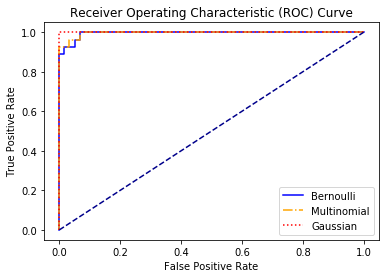

In [706]:

#AUC Score
GNB_auc= roc_auc_score(y_test,GNB_proba)
MNB_auc= roc_auc_score(y_test,MNB_proba)
BNB_auc= roc_auc_score(y_test,BNB_proba)
print("GNB-AUC: %0.2f"%GNB_auc) 
print("MNB-AUC: %0.2f"%MNB_auc) 
print("BNB-AUC: %0.2f"%BNB_auc) 
GNB_fpr, GNB_tpr, thresholds = roc_curve(y_test, GNB_proba)
MNB_fpr, MNB_tpr, thresholds = roc_curve(y_test, MNB_proba)
BNB_fpr, BNB_tpr, thresholds = roc_curve(y_test, BNB_proba)

plt.plot(BNB_fpr, BNB_tpr, color="blue", label="Bernoulli",linestyle="-")    
plt.plot(MNB_fpr, MNB_tpr, color="orange", label="Multinomial",linestyle="-.")
plt.plot(GNB_fpr, GNB_tpr, color="red", label="Gaussian",linestyle=":")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



# Analisis de los resultados obtenidos

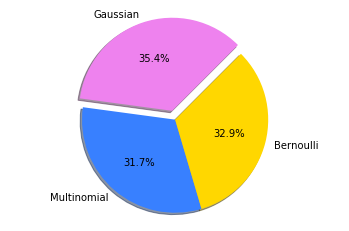

In [707]:
mobile_dev=["Gaussian","Multinomial","Bernoulli"]
numeros=[gnb_score,mnb_score,bnb_score]
colores=['violet',"#3880ff",'gold']
expansion=(0.1,0,0)
#mostrar datos
plt.pie(numeros,explode=expansion,labels=mobile_dev,colors=colores, autopct="%1.1f%%",shadow=True,startangle=45)
plt.axis("equal")
plt.show()




 Habiendo elegido cambiar el valor a binario de democrata y republicano, el algoritmo con mejor eficacia fue el Gausiano, seguido del Bernoulli y Multinomial.
 Ya que los rangos era muy elevados, en la grafica de la curva de ROC no se muestra gran diferencia, y dependiendo del random de los training y test sets esta puede no mostrar mucha diferencia entre una linea o la otra.
 Se muestran tambien todos las metricas de cada uno de los algoritmos. Manejando funciones y formulas usando los False Positives, True Positives, False Negatives, y True Negatives.
 Termino con una grafica de pie con la diferencia de eficacia entre cada uno.

## Referencias:
    https://www.quora.com/What-is-the-difference-between-the-the-Gaussian-Bernoulli-Multinomial-and-the-regular-Naive-Bayes-algorithms
    https://stackoverflow.com/questions/30937667/naivebayes-classifier-handling-different-data-types-in-python
    https://towardsdatascience.com/build-and-compare-3-models-nlp-sentiment-prediction-67320979de61